<a href="https://colab.research.google.com/github/pakaji93/Data_Science_Project/blob/main/Mini_Project_3_Gandhung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

# read data dari google sheets untuk dijadikan dataframe

gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1YfVPeOwgHwfqCTA81UZgfNTmSNMVFwvkvfaGmxB-dXI/edit#gid=1646824826')
sheets = gsheets.worksheet('BankChurners').get_all_values()


In [ ]:
df = pd.DataFrame(sheets)
# df.head()

In [ ]:
df.set_axis(df.iloc[0], axis='columns', inplace=True)
df.drop(0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691,777,11914,1.335,1144,42,1.625,0.061,9.34E-05,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256,864,7392,1.541,1291,33,3.714,0.105,5.69E-05,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418,0,3418,2.594,1887,20,2.333,0,2.11E-05,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313,2517,796,1.405,1171,20,2.333,0.76,0.00013366,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716,0,4716,2.175,816,28,2.5,0,2.17E-05,0.99998


In [ ]:
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                              --------------  ----- 
 0   CLIENTNUM                                                                                                                           10127 non-null  object
 1   Attrition_Flag                                                                                                                      10127 non-null  object
 2   Customer_Age                                                                                                                        10127 non-null  object
 3   Gender                                                                                

In [ ]:
df1 = df[['Attrition_Flag','Customer_Age','Gender','Education_Level','Income_Category']]
df1.head()

,Attrition_Flag,Customer_Age,Gender,Education_Level,Income_Category
0,Existing Customer,45,M,High School,$60K - $80K
1,Existing Customer,49,F,Graduate,Less than $40K
2,Existing Customer,51,M,Graduate,$80K - $120K
3,Existing Customer,40,F,High School,Less than $40K
4,Existing Customer,40,M,Uneducated,$60K - $80K


In [ ]:
df1['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

# Histogram Visualization

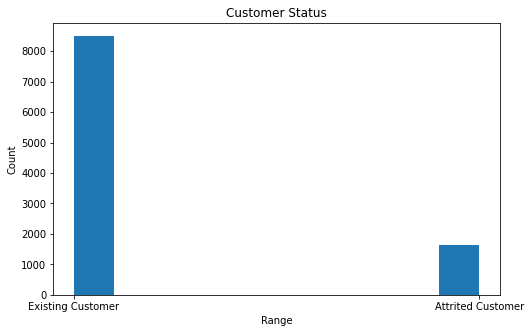

In [ ]:
plt.figure(figsize=(8,5))
counts, edges, bars = plt.hist(df1['Attrition_Flag'])
plt.title('Customer Status')
plt.xlabel('Range')
plt.ylabel('Count')

plt.show()

Jumlah existing customer lebih banyak dibandingkan dengan pelanggan baru

In [ ]:
pd.to_numeric(df1['Customer_Age'],errors='coerce')

0        45
1        49
2        51
3        40
4        40
         ..
10122    50
10123    41
10124    44
10125    30
10126    43
Name: Customer_Age, Length: 10127, dtype: int64

In [ ]:
df1['Customer_Age_Cat'] = np.where(df1['Customer_Age'] < 30, '< 30',
                          np.where(df1['Customer_Age'] < 40, '30 - 40',
                          np.where(df1['Customer_Age'] < 50, '40 - 50',
                          np.where(df1['Customer_Age'] < 60, '50 - 60', '> 60'))))

Catgram = df1['Customer_Age_Cat'].value_counts().reset_index()

Catgram['index'] = pd.Categorical(Catgram['index'], ordered=True,
                   categories=['< 30', '30 - 40', '40 - 50', '50 - 60', '> 60'])

In [ ]:
Catgram.head()

,index,Customer_Age_Cat
0,40 - 50,4561
1,50 - 60,2998
2,30 - 40,1841
3,> 60,532
4,< 30,195


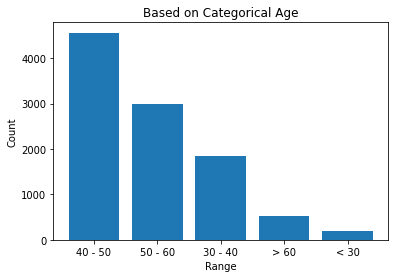

In [ ]:
plt.bar(Catgram['index'], Catgram['Customer_Age_Cat'])
plt.title('Based on Categorical Age')
plt.xlabel('Range')
plt.ylabel('Count')

plt.show()

Secara usia pelanggan, pelanggan didominasi oleh usia 40 - 50 tahun

# Area Plot

In [ ]:
df2 = df[['Attrition_Flag','Customer_Age','Gender','Education_Level','Income_Category','Total_Trans_Amt']]

In [ ]:
df2['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [ ]:
pd.to_numeric(df2['Total_Trans_Amt'],errors='coerce')

0         1144
1         1291
2         1887
3         1171
4          816
         ...  
10122    15476
10123     8764
10124    10291
10125     8395
10126    10294
Name: Total_Trans_Amt, Length: 10127, dtype: int64

In [ ]:
uneducated = df2[df2['Education_Level'] == 'Uneducated'][['Income_Category', 'Total_Trans_Amt']]
uneducated = uneducated.groupby('Income_Category').agg({'Total_Trans_Amt':'sum'})

high_school = df2[df2['Education_Level'] == 'High School'][['Income_Category', 'Total_Trans_Amt']]
high_school = high_school.groupby('Income_Category').agg({'Total_Trans_Amt':'sum'})

college = df2[df2['Education_Level'] == 'College'][['Income_Category', 'Total_Trans_Amt']]
college = college.groupby('Income_Category').agg({'Total_Trans_Amt':'sum'})

graduate = df2[df2['Education_Level'] == 'Graduate'][['Income_Category', 'Total_Trans_Amt']]
graduate = graduate.groupby('Income_Category').agg({'Total_Trans_Amt':'sum'})

post_graduate = df2[df2['Education_Level'] == 'Post-Graduate'][['Income_Category', 'Total_Trans_Amt']]
post_graduate = post_graduate.groupby('Income_Category').agg({'Total_Trans_Amt':'sum'})

doctorate = df2[df2['Education_Level'] == 'Doctorate'][['Income_Category', 'Total_Trans_Amt']]
doctorate = doctorate.groupby('Income_Category').agg({'Total_Trans_Amt':'sum'})


In [ ]:
temp = pd.concat([uneducated, high_school, college, graduate, post_graduate, doctorate], axis=1)
temp.columns = ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']

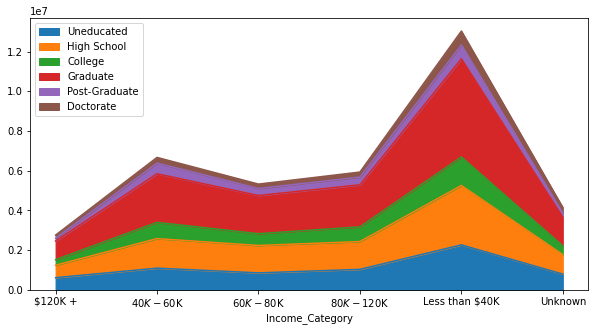

In [ ]:
temp.plot.area(figsize=(10,5))

plt.show()

Dari Grafik terlihat secara kategori income, bahwasanya kategori **Less than 40K** melakukan jumlah transaksi yang paling banyak diantara kategori lain

# Bar Chart

In [ ]:
temp2 = df2['Education_Level'].value_counts().reset_index()

<BarContainer object of 7 artists>

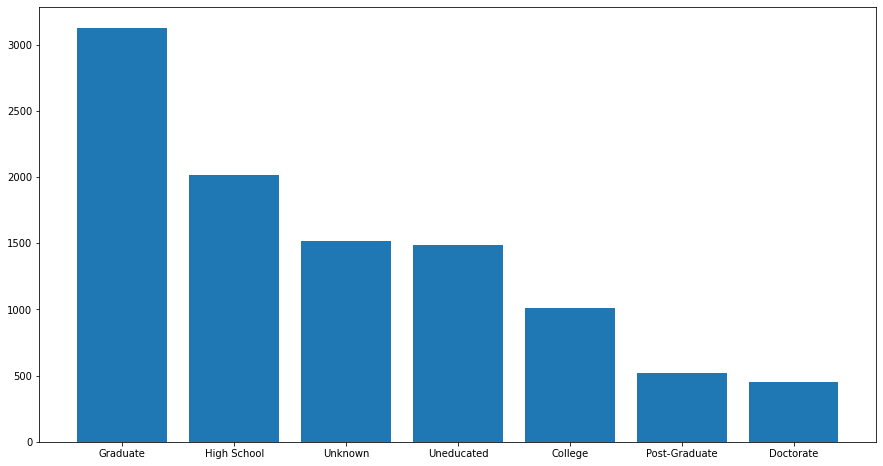

In [ ]:
plt.figure(figsize=(15,8))
plt.bar(temp2['index'], temp2['Education_Level'])

Grafik jumlah pelanggan berdasarkan Level Edukasi

# Pie Chart

In [ ]:
temp2.drop(2, inplace=True)

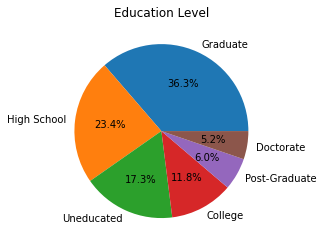

In [ ]:
plt.pie(x=temp2['Education_Level'], labels=temp2['index'], autopct='%1.1f%%')
plt.title('Education Level')

plt.show()

Dari grafik diatas dapat dilihat bahwa tingkat pendidikan pelanggan paling besar secara berurutan:

**-Graduate : 36,3%**

**-High School : 23,4%**

**-Uneducated : 17,3%**

**-College : 11,8%**

**-Post Graduate : 6,0%**

**-Doctorate : 5,2%**

In [ ]:
temp3 = df2['Gender'].value_counts().reset_index()

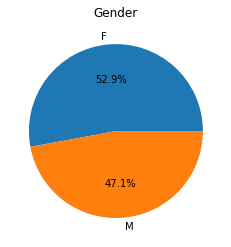

In [ ]:
plt.pie(x=temp3['Gender'], labels=temp3['index'], autopct='%1.1f%%')
plt.title('Gender')

plt.show()

Dari grafik diatas dapat dilihat proporsi jenis kelamin dari data pelanggan adalah **52,9% Wanita** dan **47,1% Lelaki**

# Line and Bar Chart


In [ ]:
df3 = df[['Attrition_Flag','Customer_Age','Gender','Education_Level','Income_Category','Credit_Limit', 'Total_Trans_Amt']]

In [ ]:
df3['Total_Trans_Amt'] = pd.to_numeric(df3['Total_Trans_Amt'],errors='coerce')
df3['Credit_Limit'] = pd.to_numeric(df3['Credit_Limit'],errors='coerce')

In [ ]:
df3.info()

In [ ]:
temp4 = df3.groupby('Income_Category').agg({'Credit_Limit':'mean', 'Total_Trans_Amt':'mean'})
temp4.drop('Unknown', inplace=True)
temp4

,Credit_Limit,Total_Trans_Amt
Income_Category,,
$120K +,19717.322558,4529.467675
$40K - $60K,5462.259832,4405.618994
$60K - $80K,10758.772967,4450.712553
$80K - $120K,15809.890945,4482.960261
Less than $40K,3754.404521,4363.420107


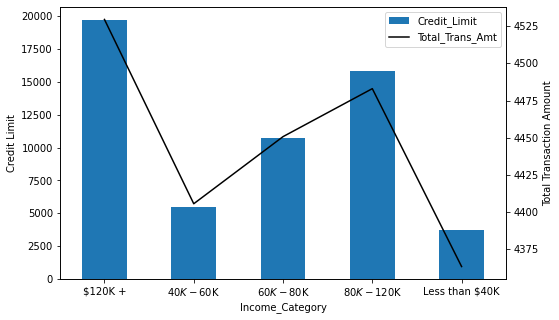

In [ ]:
ax =  temp4.plot.bar(y='Credit_Limit', ylabel='Credit Limit', figsize=(8, 5))
temp4.plot(y='Total_Trans_Amt', c='k', ax=ax, use_index=False, secondary_y=True, mark_right=False)
ax.right_ax.set_ylabel('Total Transaction Amount');


Dari grafik diatas dapat dilihat bahwa:

**- Untuk kategori < 40K cenderung melakukan transaksi melebihi limit credit**

**- Sementara untuk kategori 40-60K, amount transaksi hampir mendekati limit credit**